In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/Users/elmoore/Documents/Python Data Wrangling Class/Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


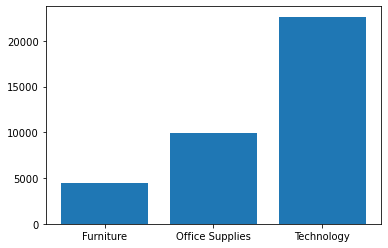

In [4]:
# Plot Sales by Category. Looks good to me :)
plt.bar(df['Category'], df['Sales'])
plt.show()

In [12]:
# Subset to rows where Sales > 100 from first 10 rows
df_subset = df.loc[[i for i in range(10)], ['Ship Mode', 'State', 'Quantity', 'Sales']]
test_data = df_subset[df_subset['Sales'] > 100].drop('Sales', axis=1)
test_data

,Ship Mode,State,Quantity
0,Second Class,Kentucky,2
1,Second Class,Kentucky,3
3,Standard Class,Florida,5
7,Standard Class,California,6
9,Standard Class,California,5


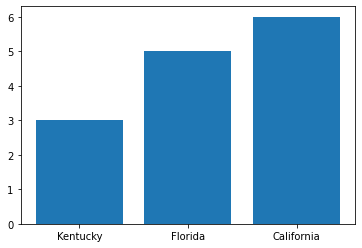

In [36]:
plt.bar(x=test_data['State'], height=test_data['Quantity'])
plt.show()
# Doesn't take the sum, takes the highest/max value from each of the categories
# Need to explicitly aggregate data first!!

In [37]:
# Pre-aggregate data: groupby
gb = test_data[['State', 'Quantity']].groupby('State').sum()
print(type(gb))
gb

<class 'pandas.core.frame.DataFrame'>


,Quantity
State,
California,11
Florida,5
Kentucky,5


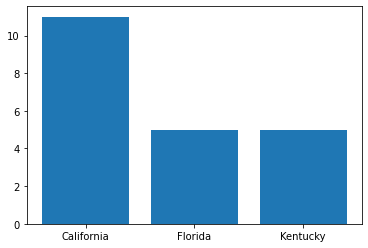

In [38]:
# plot pre-agg'd groupby df
plt.bar(x=gb.index, height=gb['Quantity'])
plt.show()

In [39]:
# pre-agg test_data with pivot_table
pt = test_data.pivot_table('Quantity', 'State', aggfunc='sum')
print(type(pt))
pt

<class 'pandas.core.frame.DataFrame'>


,Quantity
State,
California,11
Florida,5
Kentucky,5


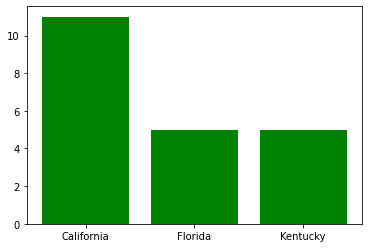

In [40]:
# plot pre-agg'd pivot_table df
plt.bar(x=pt.index, height=pt['Quantity'], color='green')
plt.show()

<AxesSubplot:xlabel='State'>

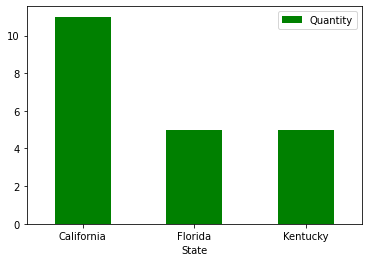

In [41]:
# plt pre-agg'd pt by calling plot method on df
pt.plot(use_index=True, y='Quantity', kind='bar', rot=0, color='green')

<AxesSubplot:xlabel='State'>

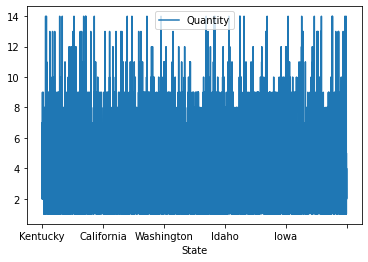

In [42]:
df.plot('State', 'Quantity')

# Other plotting library options
- seaborn (https://seaborn.pydata.org/) -> build ontop of pyplot
- plotly -> interactive
- d3.js
- powerBI desktop, powerQuery
- tableau 
- Qlik 

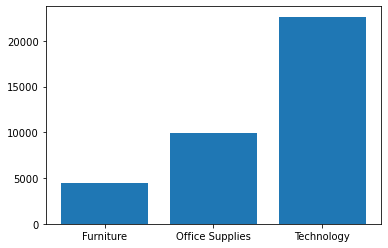

In [46]:
plt.bar(x=df['Category'], height=df['Sales'])
plt.show()

In [47]:
import seaborn as sns

<AxesSubplot:xlabel='Category', ylabel='Sales'>

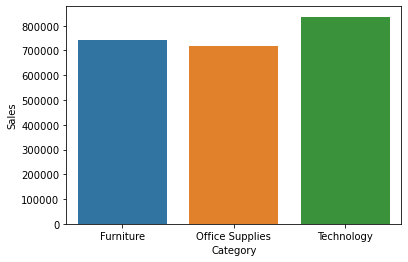

In [53]:
sns.barplot(x=df['Category'], y=df['Sales'], estimator=sum, ci=None)
# don't have to pre-agg data first with seaborn! ex) just have to put sum as parameter